In [15]:
import pandas as pd
import datetime
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import numpy as np

In [16]:
from sqlalchemy import create_engine

In [17]:
engine= create_engine('sqlite://',echo=False)

In [18]:
turnstiles_df.to_sql("mtaps",con=engine)

In [19]:
pd.read_sql('SELECT * FROM mtaps ORDER BY STATION limit 10;', engine)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,32653,H007,R248,00-00-00,1 AV,L,BMT,01/30/2021,03:00:00,REGULAR,15522681,17609896
1,32654,H007,R248,00-00-00,1 AV,L,BMT,01/30/2021,07:00:00,REGULAR,15522685,17609973
2,32655,H007,R248,00-00-00,1 AV,L,BMT,01/30/2021,11:00:00,REGULAR,15522710,17610208
3,32656,H007,R248,00-00-00,1 AV,L,BMT,01/30/2021,15:00:00,REGULAR,15522786,17610533
4,32657,H007,R248,00-00-00,1 AV,L,BMT,01/30/2021,19:00:00,REGULAR,15522871,17610880
5,32658,H007,R248,00-00-00,1 AV,L,BMT,01/30/2021,23:00:00,REGULAR,15522936,17611041
6,32659,H007,R248,00-00-00,1 AV,L,BMT,01/31/2021,03:00:00,REGULAR,15522945,17611083
7,32660,H007,R248,00-00-00,1 AV,L,BMT,01/31/2021,07:00:00,REGULAR,15522952,17611132
8,32661,H007,R248,00-00-00,1 AV,L,BMT,01/31/2021,11:00:00,REGULAR,15522979,17611295
9,32662,H007,R248,00-00-00,1 AV,L,BMT,01/31/2021,15:00:00,REGULAR,15523024,17611591


In [12]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210206, 210213, 210220,210227,210306,210313,210320,210327,210403,210410,210417,210424]
turnstiles_df = get_data(week_nums)

In [13]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,03:00:00,REGULAR,7524539,2564693
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,07:00:00,REGULAR,7524543,2564703
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,11:00:00,REGULAR,7524566,2564755
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,15:00:00,RECOVR AUD,7524643,2564793
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,19:00:00,REGULAR,7524739,2564811


In [14]:
# Remove the space on columns
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [20]:
#concat date&time on one column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [ ]:
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [210206, 210213, 210220,210227,210306,210313,210320,210327,210403,210410,210417,210424]
turnstiles_df_2 = get_data_parse_dt(week_nums)
turnstiles_df_2.head()

In [ ]:
turnstiles_df.shape

In [21]:
# Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1687584,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-02 07:00:00,2
1687602,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-05 07:00:00,2
679273,N071,R013,00-00-01,34 ST-PENN STA,2021-04-08 08:00:00,2
681309,N071,R013,00-06-00,34 ST-PENN STA,2021-04-08 08:00:00,2
680283,N071,R013,00-00-03,34 ST-PENN STA,2021-04-08 08:00:00,2
...,...,...,...,...,...,...
836336,N128,R200,00-00-05,EUCLID AV,2021-04-14 04:00:00,1
836337,N128,R200,00-00-05,EUCLID AV,2021-04-14 08:00:00,1
836338,N128,R200,00-00-05,EUCLID AV,2021-04-14 12:00:00,1
836339,N128,R200,00-00-05,EUCLID AV,2021-04-14 16:00:00,1


In [22]:
#mask Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [23]:
#Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending=False))

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-01-30 03:00:00,1
1672637,R138,R293,00-05-01,34 ST-PENN STA,2021-03-01 21:00:00,1
1672630,R138,R293,00-05-01,34 ST-PENN STA,2021-02-28 17:00:00,1
1672631,R138,R293,00-05-01,34 ST-PENN STA,2021-02-28 21:00:00,1
1672632,R138,R293,00-05-01,34 ST-PENN STA,2021-03-01 01:00:00,1
...,...,...,...,...,...,...
836318,N128,R200,00-00-05,EUCLID AV,2021-04-11 04:00:00,1
836319,N128,R200,00-00-05,EUCLID AV,2021-04-11 08:00:00,1
836320,N128,R200,00-00-05,EUCLID AV,2021-04-11 12:00:00,1
836321,N128,R200,00-00-05,EUCLID AV,2021-04-11 16:00:00,1


In [25]:
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [26]:
turnstiles_df.shape

(2508951, 10)

In [28]:
# اخر قراءه لليوم يعني نهاية اليوم كم كان عدداللي دخلو هذي المحطه 
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index= False)
                        .ENTRIES.first())

In [29]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/30/2021,7524821
1,A002,R051,02-00-00,59 ST,01/31/2021,7525089
2,A002,R051,02-00-00,59 ST,02/01/2021,7525260
3,A002,R051,02-00-00,59 ST,02/02/2021,7525600
4,A002,R051,02-00-00,59 ST,02/03/2021,7526164


In [30]:
#entries with a spesific date  
turnstiles_df[(turnstiles_df["C/A"] == "A002") & 
(turnstiles_df["UNIT"] == "R051") & 
(turnstiles_df["SCP"] == "02-00-00") & 
(turnstiles_df["STATION"] == "59 ST") &
(turnstiles_df["DATE"] == "01/30/2021")]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,23:00:00,7524821,2021-01-30 23:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,19:00:00,7524739,2021-01-30 19:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,15:00:00,7524643,2021-01-30 15:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,11:00:00,7524566,2021-01-30 11:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,07:00:00,7524543,2021-01-30 07:00:00
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/30/2021,03:00:00,7524539,2021-01-30 03:00:00


In [31]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                   .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                   .apply(lambda grp: grp.shift(1)))

<ipython-input-31-97c00eda7609>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [32]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/30/2021,7524821,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/31/2021,7525089,01/30/2021,7524821.0
2,A002,R051,02-00-00,59 ST,02/01/2021,7525260,01/31/2021,7525089.0
3,A002,R051,02-00-00,59 ST,02/02/2021,7525600,02/01/2021,7525260.0
4,A002,R051,02-00-00,59 ST,02/03/2021,7526164,02/02/2021,7525600.0
...,...,...,...,...,...,...,...,...
419444,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/19/2021,5554,04/18/2021,5554.0
419445,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/20/2021,5554,04/19/2021,5554.0
419446,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/21/2021,5554,04/20/2021,5554.0
419447,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/22/2021,5554,04/21/2021,5554.0


In [33]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [34]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,01/31/2021,7525089,01/30/2021,7524821.0
2,A002,R051,02-00-00,59 ST,02/01/2021,7525260,01/31/2021,7525089.0
3,A002,R051,02-00-00,59 ST,02/02/2021,7525600,02/01/2021,7525260.0
4,A002,R051,02-00-00,59 ST,02/03/2021,7526164,02/02/2021,7525600.0
5,A002,R051,02-00-00,59 ST,02/04/2021,7526683,02/03/2021,7526164.0
...,...,...,...,...,...,...,...,...
419444,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/19/2021,5554,04/18/2021,5554.0
419445,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/20/2021,5554,04/19/2021,5554.0
419446,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/21/2021,5554,04/20/2021,5554.0
419447,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/22/2021,5554,04/21/2021,5554.0


In [35]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
419444,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/19/2021,5554,04/18/2021,5554.0
419445,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/20/2021,5554,04/19/2021,5554.0
419446,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/21/2021,5554,04/20/2021,5554.0
419447,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/22/2021,5554,04/21/2021,5554.0
419448,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/23/2021,5554,04/22/2021,5554.0


In [36]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
387,A002,R051,02-03-02,59 ST,03/22/2021,238,03/21/2021,6.641395e+06
3275,A011,R080,01-03-00,57 ST-7 AV,01/31/2021,885624026,01/30/2021,8.856241e+08
3276,A011,R080,01-03-00,57 ST-7 AV,02/01/2021,885623923,01/31/2021,8.856240e+08
3277,A011,R080,01-03-00,57 ST-7 AV,02/02/2021,885623780,02/01/2021,8.856239e+08
3278,A011,R080,01-03-00,57 ST-7 AV,02/03/2021,885623554,02/02/2021,8.856238e+08
...,...,...,...,...,...,...,...,...
415917,R730,R431,00-00-04,EASTCHSTER/DYRE,04/20/2021,1559815312,04/19/2021,1.559816e+09
415918,R730,R431,00-00-04,EASTCHSTER/DYRE,04/21/2021,1559815179,04/20/2021,1.559815e+09
415919,R730,R431,00-00-04,EASTCHSTER/DYRE,04/22/2021,1559815025,04/21/2021,1.559815e+09
415920,R730,R431,00-00-04,EASTCHSTER/DYRE,04/23/2021,1559814862,04/22/2021,1.559815e+09


In [37]:
# the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A002") & 
(turnstiles_df["UNIT"] == "R051") & 
(turnstiles_df["SCP"] == "02-03-02") & 
(turnstiles_df["STATION"] == "59 ST") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2021, 3, 21).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
179,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/21/2021,20:00:00,6641395,2021-03-21 20:00:00
178,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/21/2021,16:00:00,6641312,2021-03-21 16:00:00
177,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/21/2021,12:00:00,6641256,2021-03-21 12:00:00
176,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/21/2021,08:00:00,6641231,2021-03-21 08:00:00
175,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/21/2021,04:00:00,6641227,2021-03-21 04:00:00


In [38]:
# how many stations have this problem
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A002  R051  02-03-02  59 ST               1
A011  R080  01-03-00  57 ST-7 AV         83
A025  R023  01-06-00  34 ST-HERALD SQ     1
A033  R170  02-00-05  14 ST-UNION SQ      1
A047  R087  00-06-01  CITY HALL           1
                                         ..
R619  R059  00-03-00  GRAND ARMY PLAZ     1
R622  R123  00-00-00  FRANKLIN AV        82
R624  R124  00-00-02  KINGSTON AV         1
R730  R431  00-00-04  EASTCHSTER/DYRE    83
S101  R070  00-00-04  ST. GEORGE          1
Length: 192, dtype: int64

In [39]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

238 6641395.0
117 11715665.0
738 18398229.0
327680 185586773.0
127 1657032.0
262152 553649999.0
80 1640812.0
327834 2642486.0
104 17275602.0
262272 2255518.0
393225 7714275.0
57 2028804.0
2147432315 8421808.0
16712028 6294957.0
177 16712669.0
262144 33554713.0
106 67960951.0
232 4735529.0
147 11567738.0
1950 13809288.0
54 7903750.0
471 1377273.0
0 67108864.0
262297 1566066.0
1534984195 0.0
23157312 1627480738.0
35 10195434.0
702 3651815.0
697 13204039.0
262152 67112607.0
0 2042881.0
262144 537268042.0
262185 67617764.0
33030166 42.0
44 9855012.0
262296 8864207.0
338 15440422.0
436 1721769.0
79 1663686.0
72 2101534.0
262145 67109778.0
15 1571402.0
36 1380657.0
175 315605508.0
852524 2830560.0
66470 17650908.0
70 30154514.0
1040213826 4086923.0
151200964 50928236.0
53237519 738434610.0
73220297 1560551488.0
536886506 2125787.0
145 37879542.0
499 1278035.0
632 4266134.0
119 1208346.0
104 11667763.0
577 11839228.0


In [40]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/31/2021,7525089,01/30/2021,7524821.0,268.0
2,A002,R051,02-00-00,59 ST,02/01/2021,7525260,01/31/2021,7525089.0,171.0
3,A002,R051,02-00-00,59 ST,02/02/2021,7525600,02/01/2021,7525260.0,340.0
4,A002,R051,02-00-00,59 ST,02/03/2021,7526164,02/02/2021,7525600.0,564.0
5,A002,R051,02-00-00,59 ST,02/04/2021,7526683,02/03/2021,7526164.0,519.0


In [41]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,01/31/2021,1799.0
1,A002,R051,59 ST,02/01/2021,1685.0
2,A002,R051,59 ST,02/02/2021,2825.0
3,A002,R051,59 ST,02/03/2021,4339.0
4,A002,R051,59 ST,02/04/2021,4509.0


In [42]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/31/2021,3145.0
1,1 AV,02/01/2021,2646.0
2,1 AV,02/02/2021,3927.0
3,1 AV,02/03/2021,5782.0
4,1 AV,02/04/2021,6374.0


In [43]:
station_totals = station_daily.groupby('STATION').sum()    .sort_values('DAILY_ENTRIES', ascending=False)    .reset_index()
station_totals.head(10)

,STATION,DAILY_ENTRIES
0,TIMES SQ-42 ST,3100034.0
1,1 AV,2939943.0
2,34 ST-HERALD SQ,2939264.0
3,34 ST-PENN STA,2824224.0
4,86 ST,2821503.0
5,GRD CNTRL-42 ST,2473226.0
6,125 ST,2434436.0
7,59 ST COLUMBUS,2326754.0
8,FLUSHING-MAIN,1993380.0
9,FULTON ST,1980856.0


In [44]:
turnstiles_daily[(turnstiles_daily["STATION"] == "TIMES SQ-42 ST")]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
5963,A021,R032,01-00-00,TIMES SQ-42 ST,01/31/2021,9881917,01/30/2021,9881608.0,309.0
5964,A021,R032,01-00-00,TIMES SQ-42 ST,02/01/2021,9882212,01/31/2021,9881917.0,295.0
5965,A021,R032,01-00-00,TIMES SQ-42 ST,02/02/2021,9882764,02/01/2021,9882212.0,552.0
5966,A021,R032,01-00-00,TIMES SQ-42 ST,02/03/2021,9883768,02/02/2021,9882764.0,1004.0
5967,A021,R032,01-00-00,TIMES SQ-42 ST,02/04/2021,9884821,02/03/2021,9883768.0,1053.0
...,...,...,...,...,...,...,...,...,...
284742,R151,R033,00-00-08,TIMES SQ-42 ST,04/19/2021,9102884,04/18/2021,9102121.0,763.0
284743,R151,R033,00-00-08,TIMES SQ-42 ST,04/20/2021,9103649,04/19/2021,9102884.0,765.0
284744,R151,R033,00-00-08,TIMES SQ-42 ST,04/21/2021,9104436,04/20/2021,9103649.0,787.0
284745,R151,R033,00-00-08,TIMES SQ-42 ST,04/22/2021,9105181,04/21/2021,9104436.0,745.0


In [45]:
single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "A021") & 
(turnstiles_daily["UNIT"] == "R032") & 
(turnstiles_daily["SCP"] == "01-00-00") & 
(turnstiles_daily["STATION"] == "TIMES SQ-42 ST")]

single_turnstile.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
5963,A021,R032,01-00-00,TIMES SQ-42 ST,01/31/2021,9881917,01/30/2021,9881608.0,309.0
5964,A021,R032,01-00-00,TIMES SQ-42 ST,02/01/2021,9882212,01/31/2021,9881917.0,295.0
5965,A021,R032,01-00-00,TIMES SQ-42 ST,02/02/2021,9882764,02/01/2021,9882212.0,552.0
5966,A021,R032,01-00-00,TIMES SQ-42 ST,02/03/2021,9883768,02/02/2021,9882764.0,1004.0
5967,A021,R032,01-00-00,TIMES SQ-42 ST,02/04/2021,9884821,02/03/2021,9883768.0,1053.0


Text(0.5, 1.0, 'Daily Entries for Turnstile A021/R032/01-00-00 at TIMES SQ-42 ST')

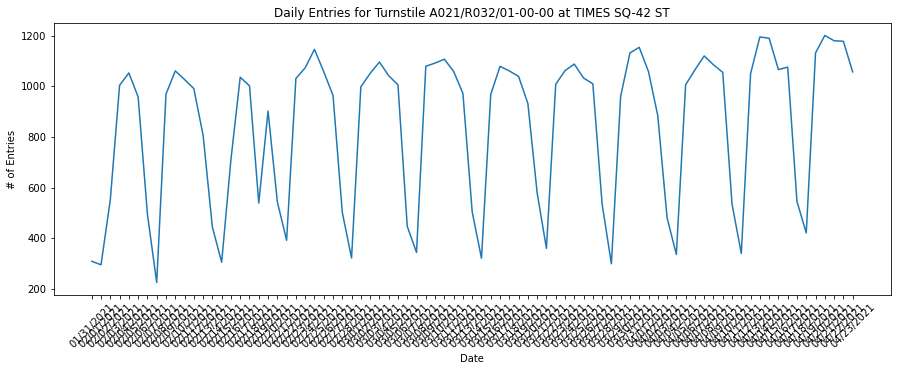

In [46]:
plt.figure(figsize=(15,5))
plt.plot(single_turnstile['DATE'], single_turnstile['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for Turnstile A021/R032/01-00-00 at TIMES SQ-42 ST')


In [47]:
station_daily_42_av = station_daily[station_daily['STATION'] == 'TIMES SQ-42 ST']
station_daily_42_av.head()

,STATION,DATE,DAILY_ENTRIES
29211,TIMES SQ-42 ST,01/31/2021,5932.0
29212,TIMES SQ-42 ST,02/01/2021,4858.0
29213,TIMES SQ-42 ST,02/02/2021,7733.0
29214,TIMES SQ-42 ST,02/03/2021,14878.0
29215,TIMES SQ-42 ST,02/04/2021,15683.0


Text(0.5, 1.0, 'Daily Entries for station_daily_42_av')

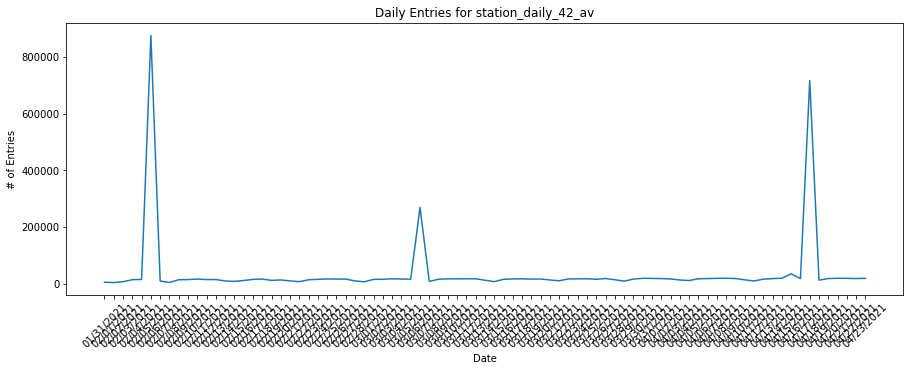

In [48]:
plt.figure(figsize=(15,5))
plt.plot(station_daily_42_av['DATE'], station_daily_42_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for station_daily_42_av')

In [49]:
station_daily_42_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_42_av['DATE']).dt.dayofweek
station_daily_42_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_42_av['DATE']).dt.week
station_daily_42_av.head()

<ipython-input-49-f5eb23714432>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_42_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_42_av['DATE']).dt.dayofweek
<ipython-input-49-f5eb23714432>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_42_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_42_av['DATE']).dt.week
<ipython-input-49-f5eb23714432>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
29211,TIMES SQ-42 ST,01/31/2021,5932.0,6,4
29212,TIMES SQ-42 ST,02/01/2021,4858.0,0,5
29213,TIMES SQ-42 ST,02/02/2021,7733.0,1,5
29214,TIMES SQ-42 ST,02/03/2021,14878.0,2,5
29215,TIMES SQ-42 ST,02/04/2021,15683.0,3,5


Text(0.5, 1.0, 'Ridership per day for TIMES SQ-42 ST')

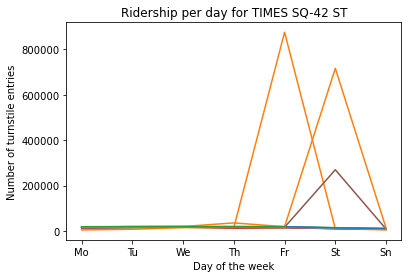

In [50]:
for i, group in station_daily_42_av.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for TIMES SQ-42 ST')

(array([224.,  75.,  35.,  16.,   6.,  11.,   3.,   3.,   0.,   5.]),
 array([   4370. ,  313936.4,  623502.8,  933069.2, 1242635.6, 1552202. ,
        1861768.4, 2171334.8, 2480901.2, 2790467.6, 3100034. ]),
 <BarContainer object of 10 artists>)

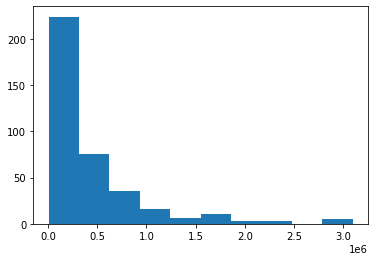

In [51]:
plt.hist(station_totals['DAILY_ENTRIES'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

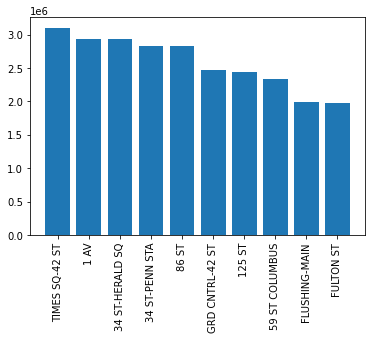

In [52]:
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)